In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# load numpy zip
data = np.load('./data/data_10000_norm.npz')

In [3]:
X  = data['arr_0'] # independent features
y = data['arr_1'] # target value

In [4]:
X.shape, y.shape

((6722, 10000), (6722,))

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size=0.25, random_state = 4)

In [6]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((5041, 10000), (1681, 10000), (5041,), (1681,))

In [7]:
X_train = X_train.reshape(X_train.shape[0],100,100)
X_test = X_test.reshape(X_test.shape[0],100,100)
Y_train = Y_train.reshape(Y_train.shape[0],-1)
Y_test = Y_test.reshape(Y_test.shape[0],-1)

In [8]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((5041, 100, 100), (1681, 100, 100), (5041, 1), (1681, 1))

array([1])

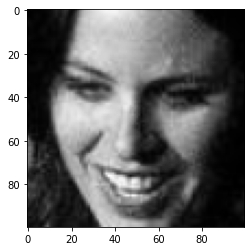

In [9]:
plt.imshow(X_train[2],cmap = 'gray')
Y_train[2]

In [10]:
#Expanding images to fit 4D convolutional Model
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)

In [11]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((5041, 100, 100, 1), (1681, 100, 100, 1), (5041, 1), (1681, 1))

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [15]:
model = Sequential()

In [16]:
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu', input_shape = (100,100,1)))
model.add(Dropout(0.2))
model.add(MaxPool2D(pool_size = (2,2), strides = 2))

In [17]:
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(Dropout(0.2))
model.add(MaxPool2D(pool_size = (2,2), strides = 2))

In [18]:
model.add(Flatten())

In [19]:
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.2))


In [20]:
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.2))

In [21]:
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.2))

In [22]:
model.add(Dense(units = 1, activation = 'sigmoid'))

In [23]:
model.compile(optimizer = 'adam', matrics = ['accuracy'], loss = 'binary_crossentropy')

In [24]:
model.fit(X_train,Y_train,batch_size = 500,epochs = 30,validation_split = 0.2)

Train on 4032 samples, validate on 1009 samples
Epoch 1/30
4032/4032 [==============================] - 67s 17ms/sample - loss: 0.7149 - val_loss: 0.6748
Epoch 2/30
4032/4032 [==============================] - 58s 14ms/sample - loss: 0.6747 - val_loss: 0.6643
Epoch 3/30
4032/4032 [==============================] - 57s 14ms/sample - loss: 0.6587 - val_loss: 0.6499
Epoch 4/30
4032/4032 [==============================] - 58s 15ms/sample - loss: 0.6343 - val_loss: 0.6073
Epoch 5/30
4032/4032 [==============================] - 59s 15ms/sample - loss: 0.6033 - val_loss: 0.5758
Epoch 6/30
4032/4032 [==============================] - 57s 14ms/sample - loss: 0.5463 - val_loss: 0.5046
Epoch 7/30
4032/4032 [==============================] - 57s 14ms/sample - loss: 0.4686 - val_loss: 0.4702
Epoch 8/30
4032/4032 [==============================] - 58s 14ms/sample - loss: 0.4323 - val_loss: 0.4907
Epoch 9/30
4032/4032 [==============================] - 58s 14ms/sample - loss: 0.4022 - val_loss: 0.492

# Model Evaluation
- Confusion Matrix
- Classification Report 
- Kappa Score
- ROC and AUC (probability)

In [25]:
y_predict = model.predict(X_test)

In [26]:
model.evaluate(X_test, Y_test)

1681/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.5520684365570935

In [27]:
from sklearn import metrics

In [28]:
y_predict_bin = y_predict>=0.5

In [29]:
y_predict_bin

array([[False],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [False]])

<AxesSubplot:>

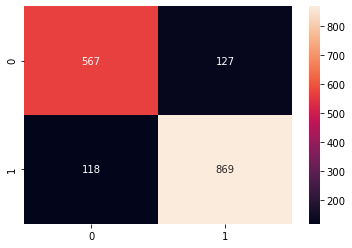

In [30]:
import seaborn as sns
cm = metrics.confusion_matrix(Y_test,y_predict_bin)
sns.heatmap(cm,annot=True,fmt ='d')

In [31]:
# classification report
cr = metrics.classification_report(Y_test,y_predict_bin,target_names=['male','female'],output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
male,0.827737,0.817003,0.822335,694.000000
female,0.872490,0.880446,0.876450,987.000000
accuracy,0.854253,0.854253,0.854253,0.854253
macro avg,0.850114,0.848724,0.849392,1681.000000
weighted avg,0.854014,0.854253,0.854109,1681.000000


In [32]:
# kappa
metrics.cohen_kappa_score(Y_test,y_predict_bin)

0.6987937708757064

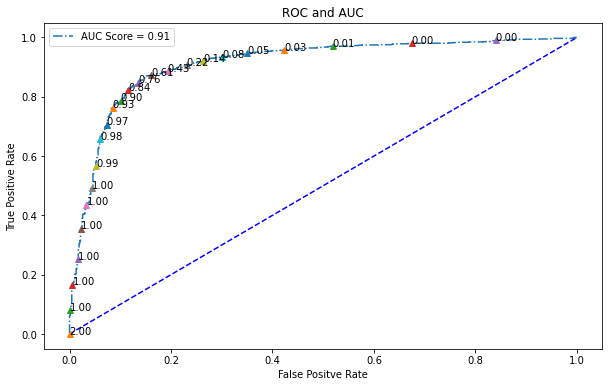

In [33]:
# roc for female
fpr,tpr,thresh = metrics.roc_curve(Y_test,y_predict)
auc_s = metrics.auc(fpr,tpr)
plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,'-.')
plt.plot([0,1],[0,1],'b--')
for i in range(0,len(thresh),20):
    plt.plot(fpr[i],tpr[i],'^')
    plt.text(fpr[i],tpr[i],"%0.2f"%thresh[i])
    
plt.legend(['AUC Score = %0.2f'%auc_s])

plt.xlabel('False Positve Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC and AUC')
plt.show()

In [41]:
# save our machine learning model
model.save("trained_model_CNN.h5")